In [2]:
import torch

notrm = torch.load('./roc_S4/notrm.pt')
nognn = torch.load('./roc_S4/nognn_S4.pt')
one_hop = torch.load('./roc_S4/1hop.pt')
three_hop = torch.load('./roc_S4/3hop.pt')
neighbor10 = torch.load('./roc_S4/neighbor10.pt')
neighbor30 = torch.load('./roc_S4/neighbor30.pt')


y_true_list_notrm, y_pred_prob_list_notrm = notrm['y_true_list'], notrm['y_pred_prob_list']
y_true_list_nognn, y_pred_prob_list_nognn = nognn['y_true_list'], nognn['y_pred_prob_list']
y_true_list_onehop, y_pred_prob_list_onehop = one_hop['y_true_list'], one_hop['y_pred_prob_list']
y_true_list_threehop, y_pred_prob_list_threehop = three_hop['y_true_list'], three_hop['y_pred_prob_list']
y_true_list_neighbor10, y_pred_prob_list_neighbor10 = neighbor10['y_true_list'], neighbor10['y_pred_prob_list']
y_true_list_neighbor30, y_pred_prob_list_neighbor30 = neighbor30['y_true_list'], neighbor30['y_pred_prob_list']


/opt/conda/envs/graph2/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


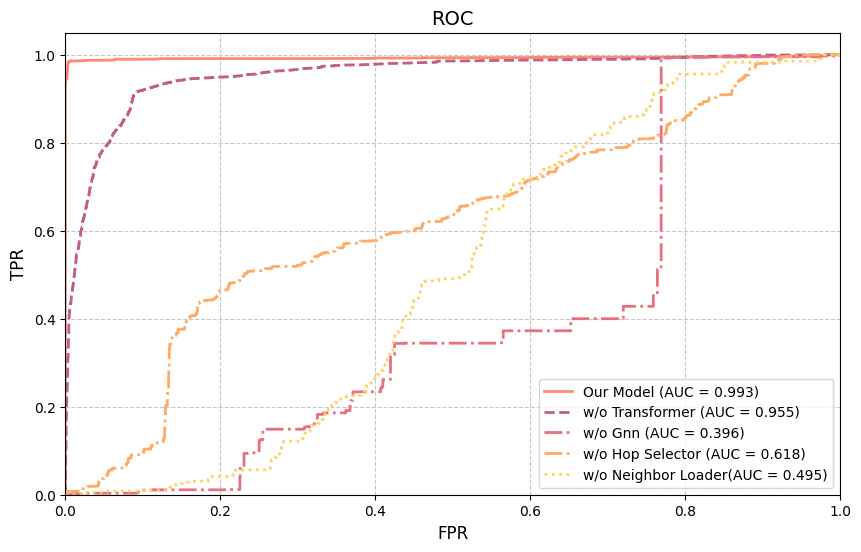

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 假设你已经有了以下数据
# y_true_list: 真实标签列表，包含0和1
# y_pred_list: 预测标签列表，包含0和1
# y_pred_prob_list: 预测为正类的概率列表

# 计算ROC曲线的参数
fpr1, tpr1, _ = roc_curve(y_true_list_notrm, y_pred_prob_list_notrm)
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_true_list_nognn, y_pred_prob_list_nognn)
auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_true_list_onehop, y_pred_prob_list_onehop)
auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_true_list_threehop, y_pred_prob_list_threehop)
auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_true_list_neighbor10, y_pred_prob_list_neighbor10)
auc5 = auc(fpr5, tpr5)

fpr6, tpr6, _ = roc_curve(y_true_list_neighbor30, y_pred_prob_list_neighbor30)
auc6 = auc(fpr6, tpr6)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr3, tpr3, color='#FF8A73', lw=2,
         label=f'Our Model (AUC = {auc3:.3f})')

plt.plot(fpr1, tpr1, color='#C25E8B', lw=2, linestyle='--',
         label=f'w/o Transformer (AUC = {auc1:.3f})')
plt.plot(fpr2, tpr2, color='#E77081', lw=2, linestyle='-.',
         label=f'w/o Gnn (AUC = {auc2:.3f})')
plt.plot(fpr4, tpr4, color='#FFAC66', lw=2, linestyle='-.',
         label=f'w/o Hop Selector (AUC = {auc4:.3f})')
plt.plot(fpr5, tpr5, color='#FFD162', lw=2, linestyle=':',
         label=f'w/o Neighbor Loader(AUC = {auc5:.3f})')
# plt.plot(fpr6, tpr6, color='#F9F871', lw=2, linestyle=':',
#          label=f'模型3 (AUC = {auc6:.3f})')

# 设置坐标轴范围和标签
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.title('ROC', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# # 可以添加一些额外的信息标注
# threshold_idx = np.argmin(np.abs(thresholds - 0.5))  # 找到接近0.5阈值的点
# plt.scatter(fpr[threshold_idx], tpr[threshold_idx], color='red', s=100, 
#             label=f'阈值=0.5 (FPR={fpr[threshold_idx]:.3f}, TPR={tpr[threshold_idx]:.3f})')

plt.savefig('./roc_all.pdf')
plt.show()

